2021-09-21: CFD Class, V. Kumar 
# Finite volume method for 1D steady state diffusion
Consider the steady state diffusion of a property φ in a one-dimensional domain. The process is governed by

$$ {d \over dx}  \left[ \Gamma {d\phi \over dx } \right] + S = 0 $$

where $\Gamma$ is the diffusion coefficient and $S$ is the source term. Boundary values of $\phi$ at points A and B are prescribed. An example of this type of process, one-dimensional heat conduction in a rod. More at https://drive.google.com/file/d/1GBn-iGhxfcweesulz87syuZcGr9teI4y/view

#!git commit -am 'updated'; !git push

In [55]:
import numpy as np
import matplotlib.pyplot as plt
#Step 1: Grid generation
#Step 2: Discretization
#Step 3: Solution of equations

### Example 4.1
Consider the problem of source-free heat conduction in an insulated rod whose ends are maintained at constant temperatures of 100°C and 500°C respectively. The one-dimensional problem sketched in Figure 4.3 is gov-
erned by

$$ {d \over dx}  \left[ \Gamma {dT \over dx } \right] = 0 $$

Calculate the steady state temperature distribution in the rod. Thermal conductivity k equals 1000 W/m.K, cross-sectional area A is $10 \times 10^{−3} m^2$. 
Note - Exact solution, T(x) = 800x + 100

[[ 300. -100.    0.    0.    0.]
 [-100.  200. -100.    0.    0.]
 [   0. -100.  200. -100.    0.]
 [   0.    0. -100.  200. -100.]
 [   0.    0.    0. -100.  300.]]
[100. 140. 220. 300. 380. 460. 500.]


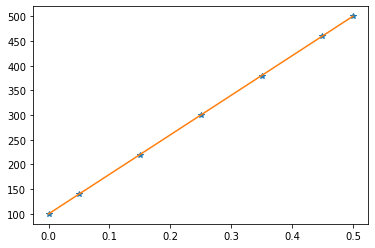

In [65]:
n=5; 
TA = 100; TB=500; L=0.5; dx=0.1; n=np.int(L/dx); 
k=1000; A=10E-3; 
x = np.linspace(0+dx/2,L-dx/2,n); #Step 1 Grid generation
xall = np.zeros(n+2); xall[0]=0; xall[n+1]=L; xall[1:n+1]=x; # Grid including the BC

#Step 2 Discretization
aW = k*A/dx; aE=k*A/dx; sP=0; sU=0; # Internal nodes
aWA = 0; aEA=k*A/dx; sPA=-2*k*A/dx; sUA=2*k*A/dx*TA; # BC node 1
aWB = k*A/dx; aEB=0; sPB=-2*k*A/dx; sUB=2*k*A/dx*TB; # BC node n

A=np.zeros([n,n]); b=np.zeros(n); T=np.zeros(n+2); T[0]=TA; T[n+1]=TB; #Initialization

for i in range(n):
    aP=aW + aE - sP; bP=sU;
    if(i==0):
        A[i,i] = aWA + aEA - sPA; A[i,i+1] = -aEA; b[i] = sUA; 
    elif (i==n-1):
        A[i,i] = aWB + aEB - sPB; A[i,i-1] = -aWB; b[i] = sUB; 
    else:
        A[i,i] = aW + aE - sP; A[i,i-1] = -aW; A[i,i+1] = -aE; b[i] = sU; 

print(A)
           
T[1:n+1] = np.linalg.solve(A,b); #Step 3: Solve

Texact = lambda x: 800*x + 100; # Exact solution
print(T)

plt.plot(xall, T, '*', xall, Texact(xall))

[main d6d78f6] updated
 1 files changed, 83 insertions(+), 10 deletions(-)
/bin/bash: !git: command not found
